In [1]:
import torch
from IPython.display import Image, clear_output

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.13.1+cpu CPU


In [2]:
!type D:\Programming\Code\Python\TARP\data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['With Helmet', 'Without Helmet']


In [3]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [4]:
!type D:\Programming\Code\Python\TARP\yolov5\models\yolov5s.yaml


# parameters
nc: 2  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-

In [5]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [6]:
%%writetemplate D:\Programming\Code\Python\TARP\yolov5\models\yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [7]:
%%time
%cd D:\Programming\Code\Python\TARP\yolov5
!python train.py --img 416 --batch 16 --epochs 100 --data D:/Programming/Code/Python/TARP/data.yaml --cfg ./models/yolov5s.yaml --weights '' --name yolov5s_results  --cache

D:\Programming\Code\Python\TARP\yolov5
Wall time: 6h 35min 1s


train: weights='', cfg=./models/yolov5s.yaml, data=D:/Programming/Code/Python/TARP/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-134-g23c4923 Python-3.8.10 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0,

In [1]:
%load_ext tensorboard
%tensorboard --logdir runs

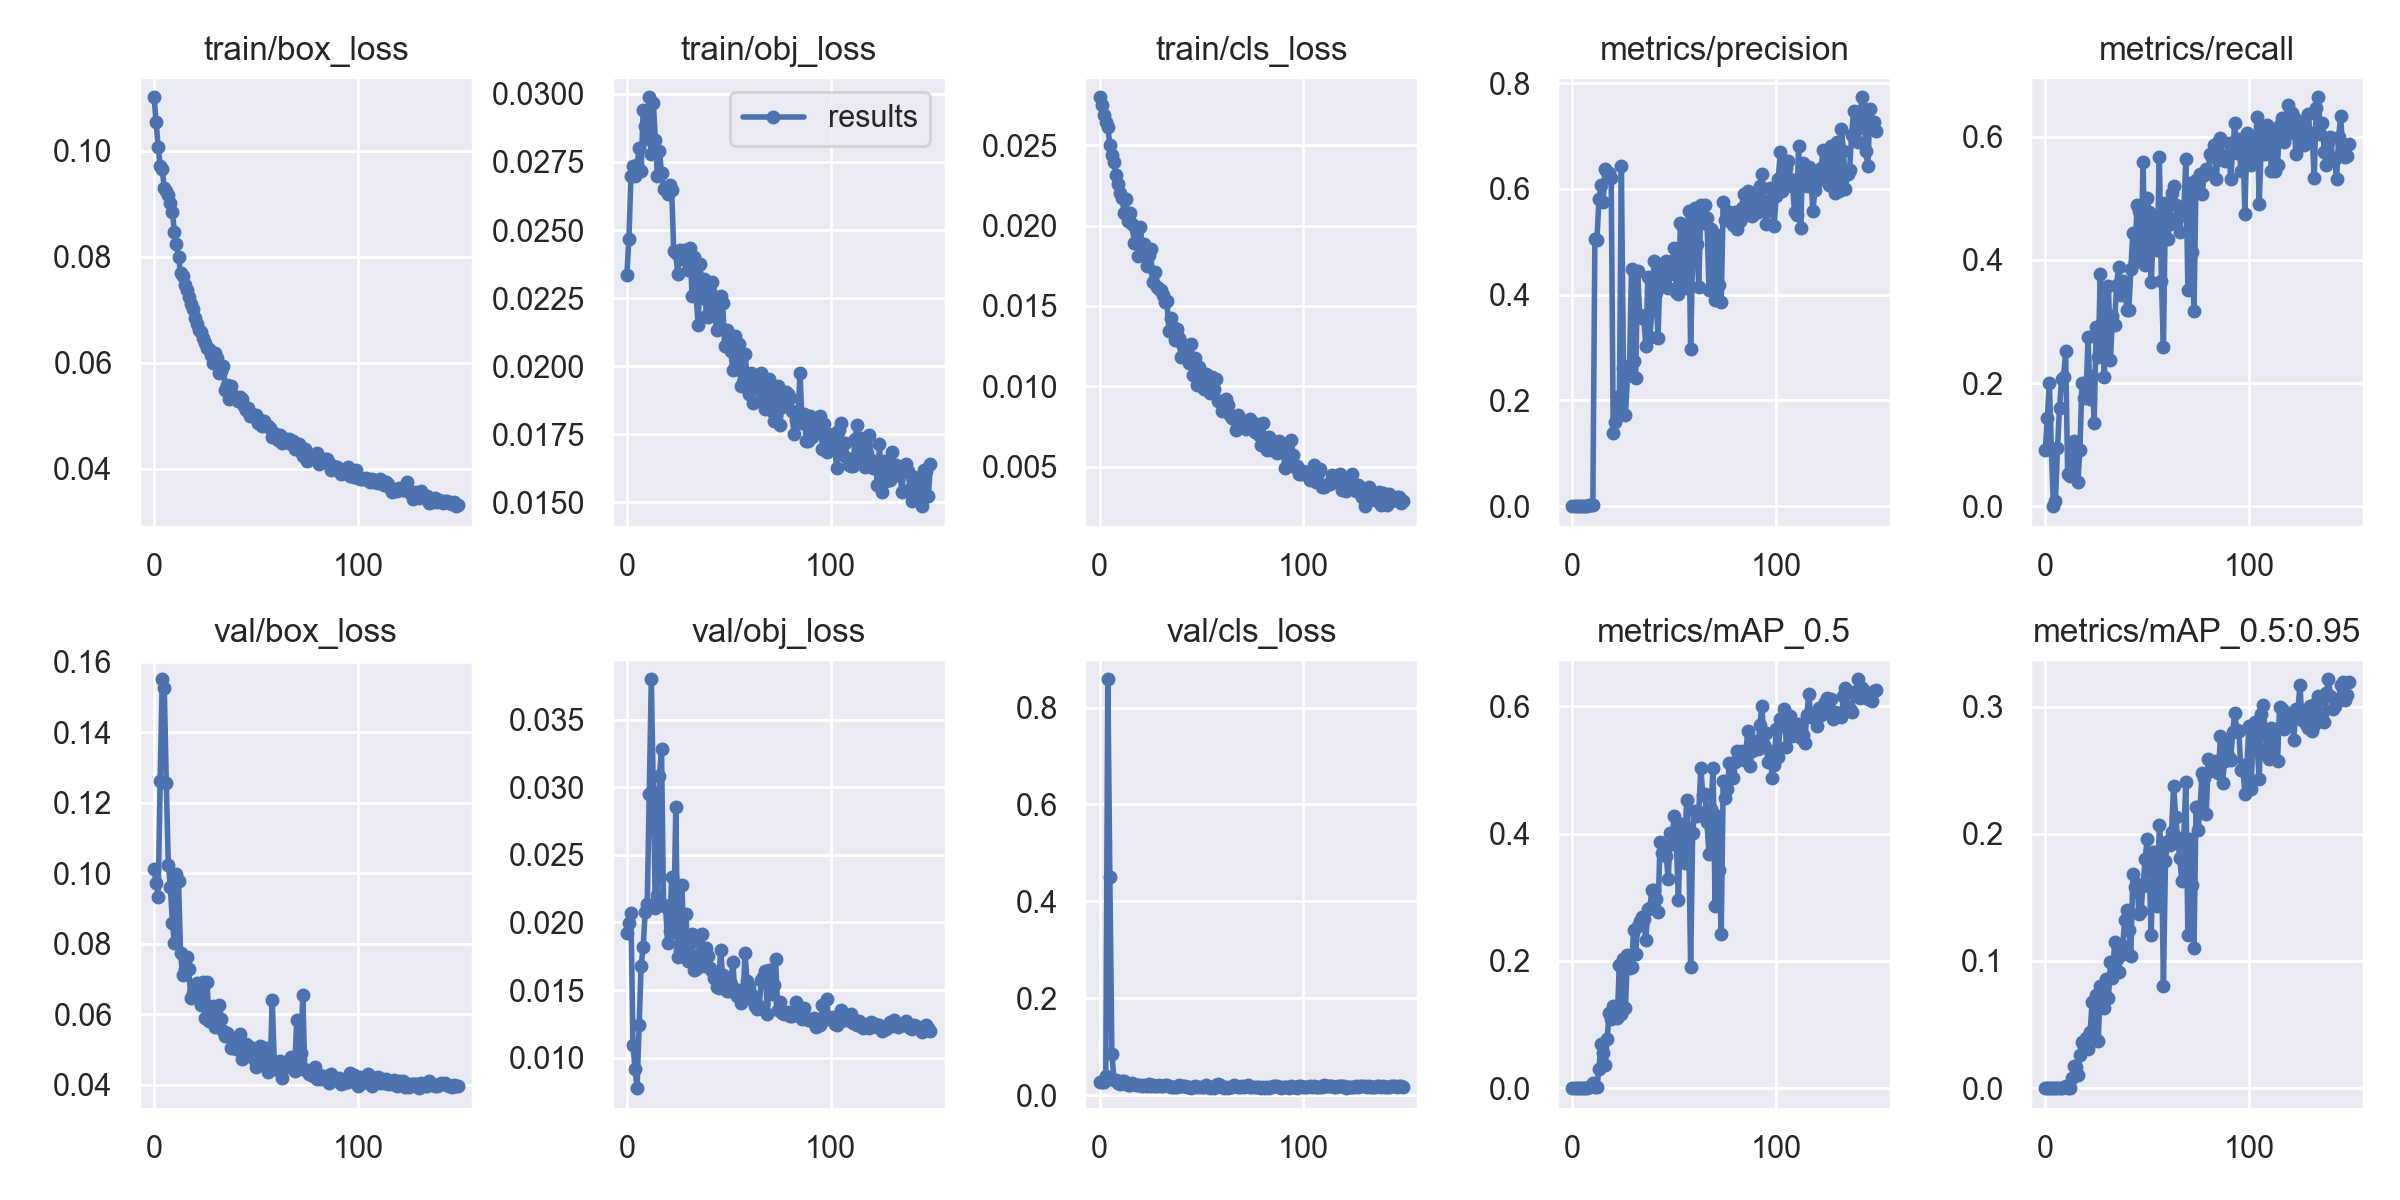

In [54]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='D:/Programming/Code/Python/TARP/yolov5/runs/train/yolov5s_results/results.png', width=1000)

GROUND TRUTH TRAINING DATA:


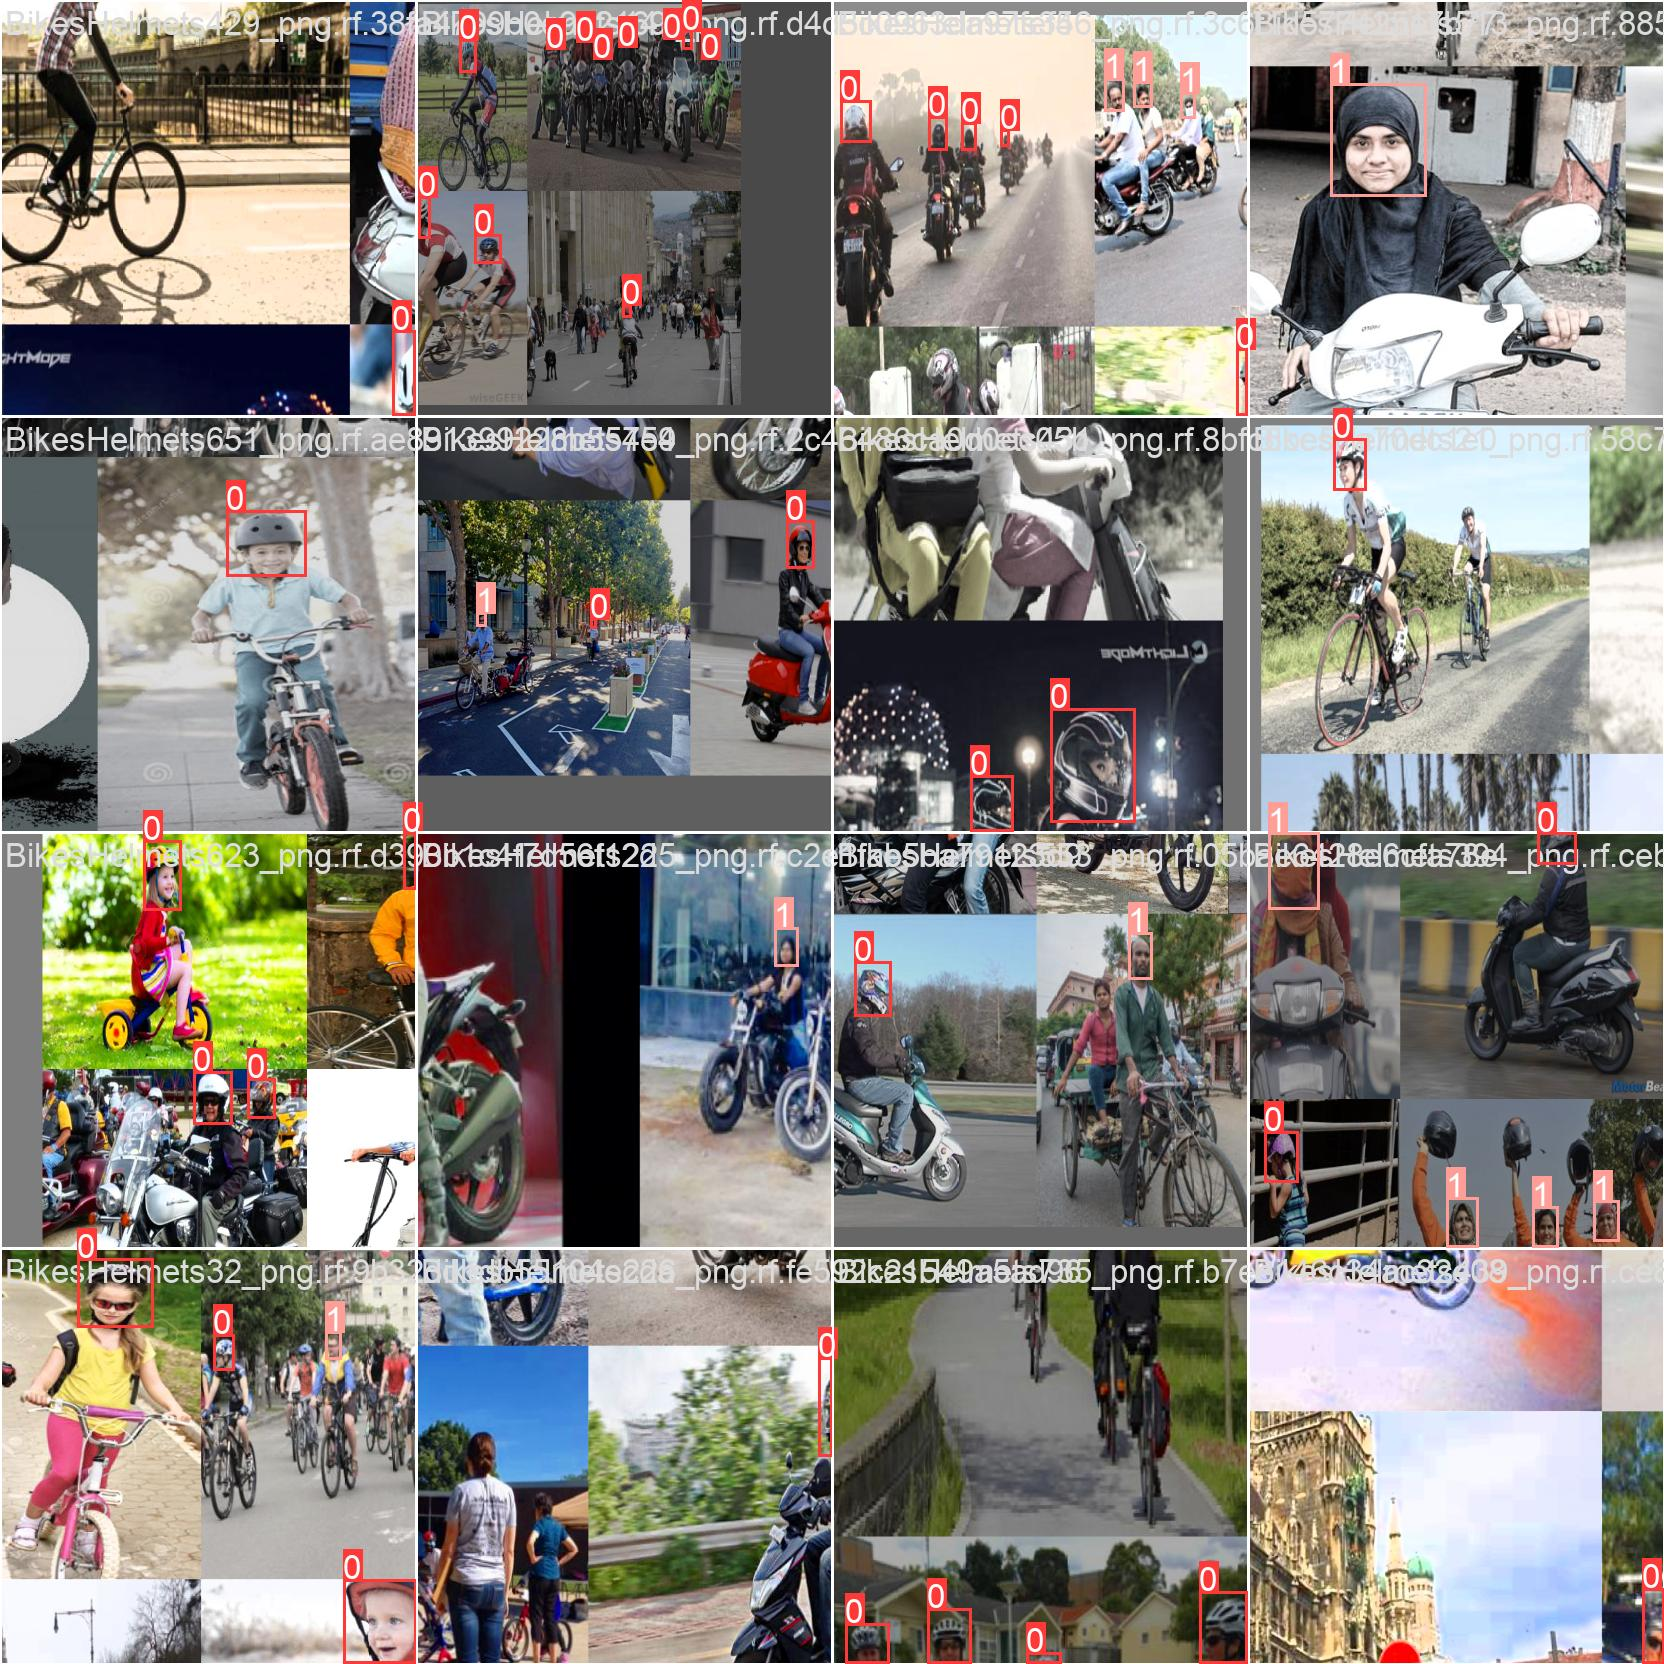

In [9]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='D:/Programming/Code/Python/TARP/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

In [10]:
%cd D:\Programming\Code\Python\TARP\yolov5
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

D:\Programming\Code\Python\TARP\yolov5


detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../test/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-134-g23c4923 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
image 1/63 D:\Programming\Code\Python\TARP\test\images\BikesHelmets105_png.rf.48032a27fb18da4c1ea30a5ec5c38684.jpg: 416x416 3 With Helmets, 147.5ms
image 2/63 D:\Programming\Code\Python\TARP\test\images\BikesHelmets129_png.rf.e767757538f5ce358391ce0f6dff5dd4.jpg: 416x416 (no detections), 122.6ms
image 3/63 D:\Programming\Code\Python\TARP\test\images\BikesHelmets133_png.rf.883

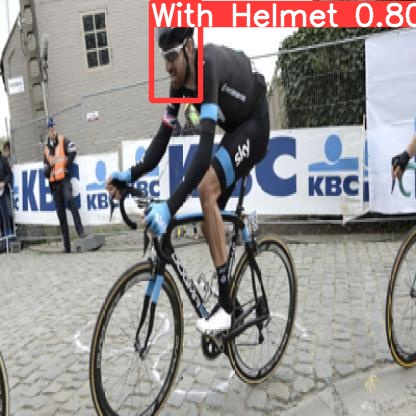

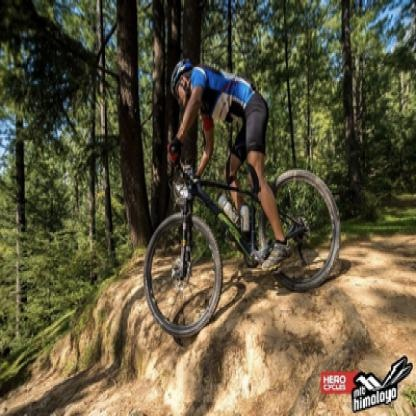

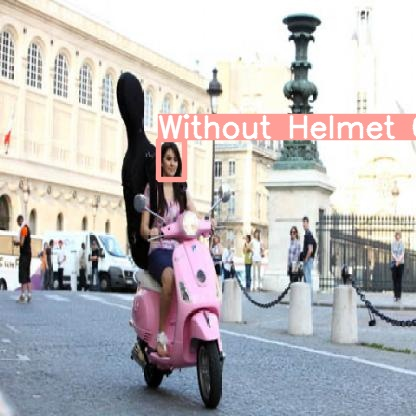

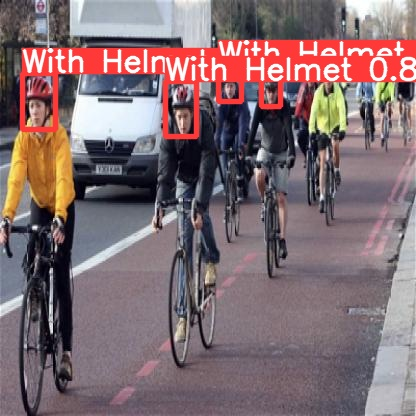

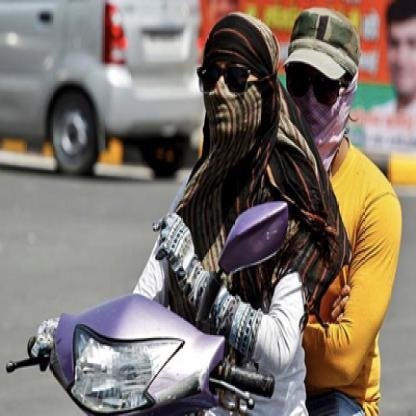

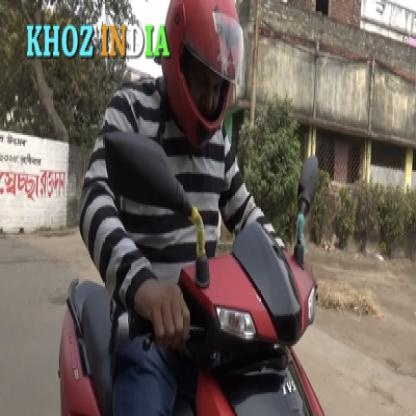

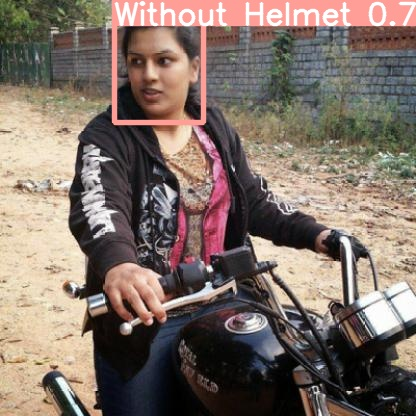

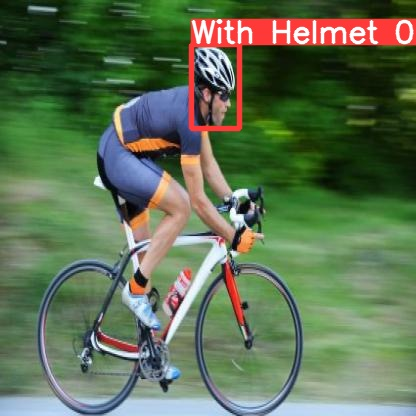

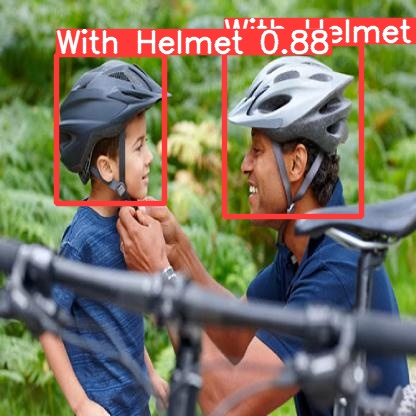

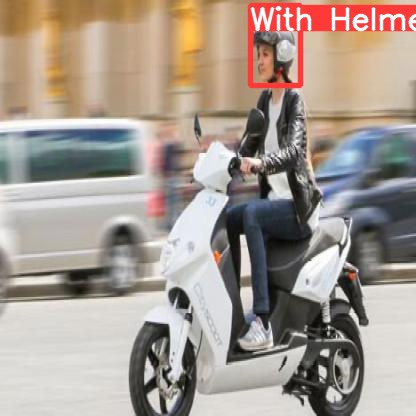

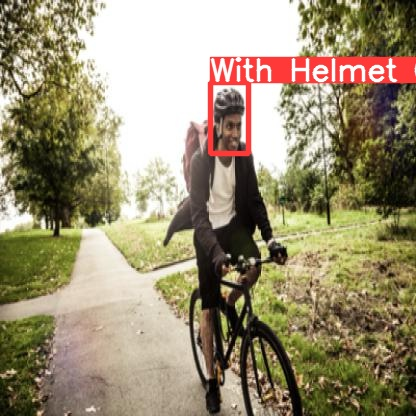

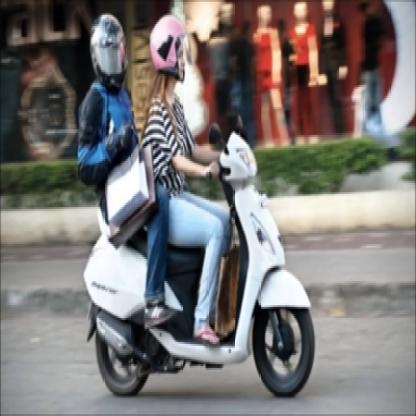

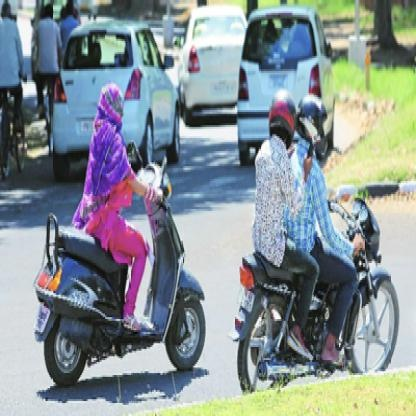

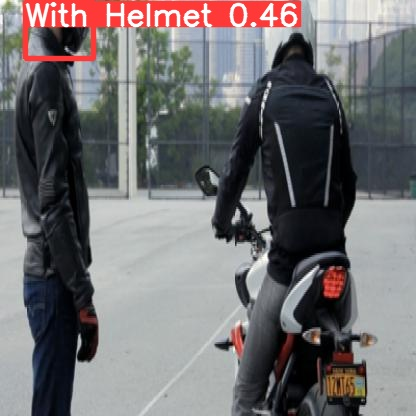

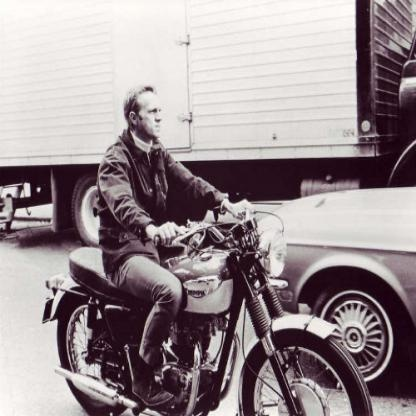

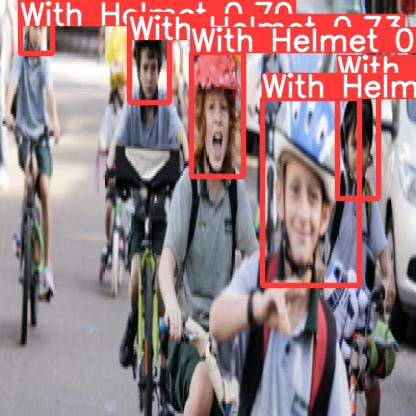

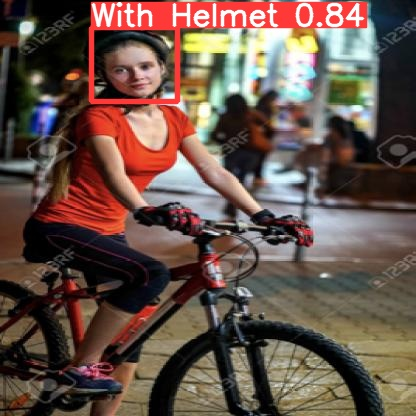

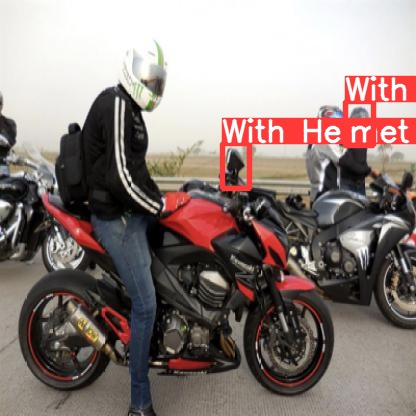

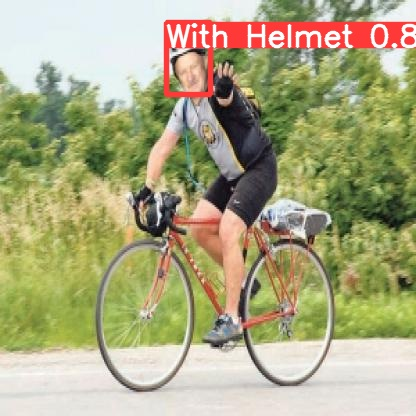

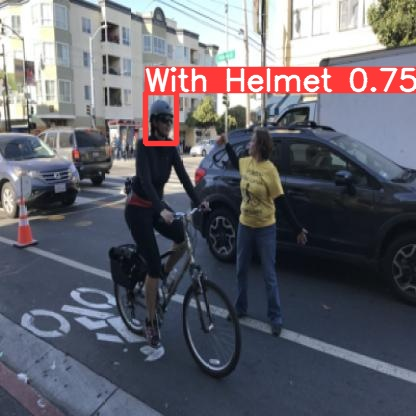

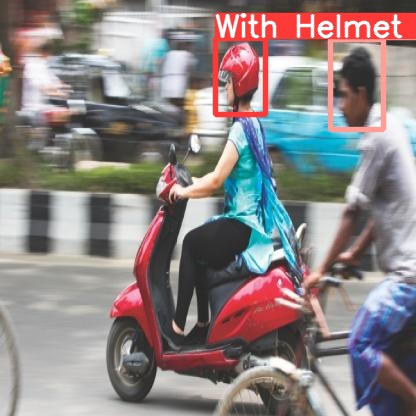

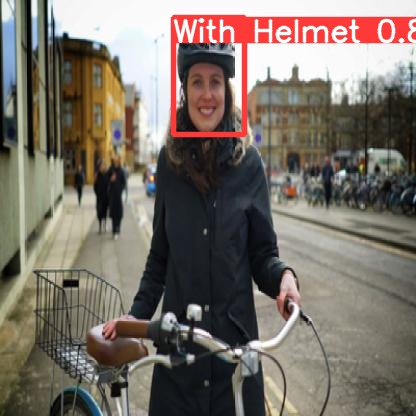

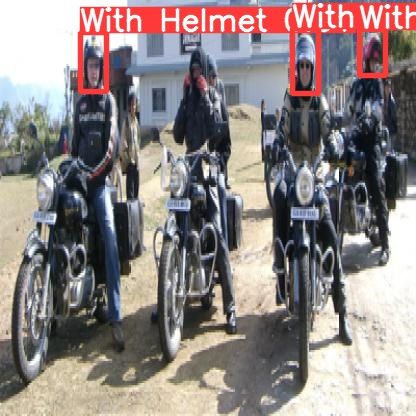

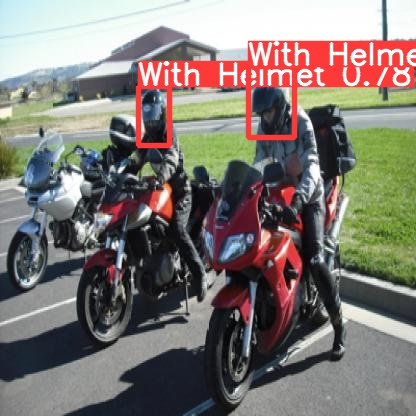

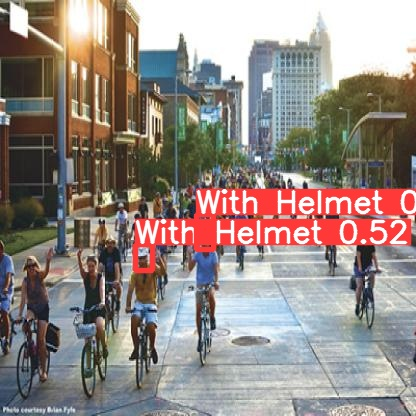

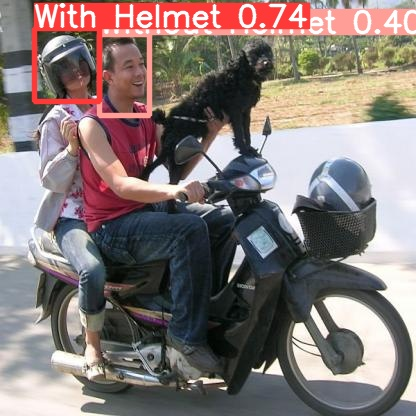

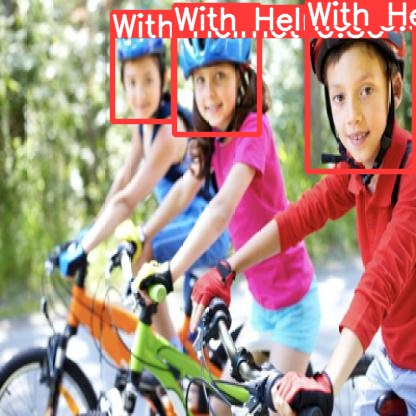

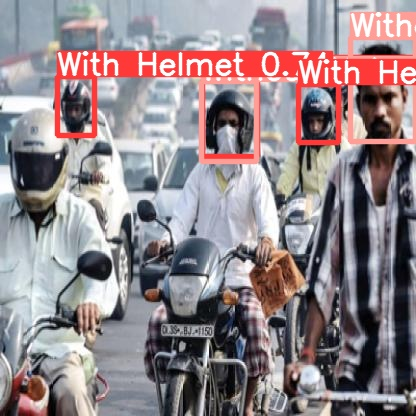

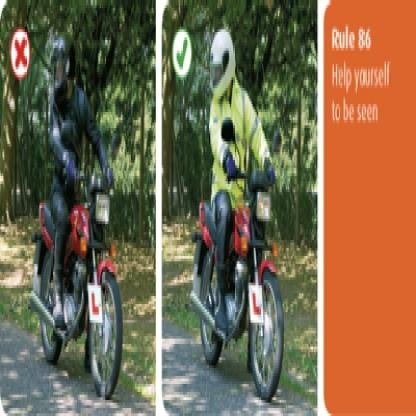

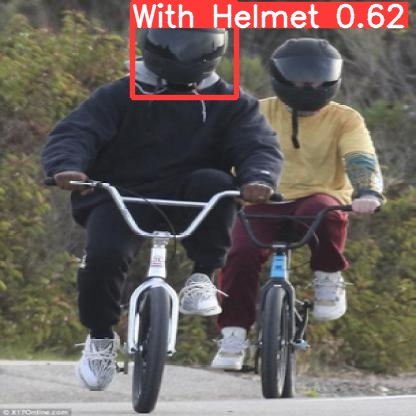

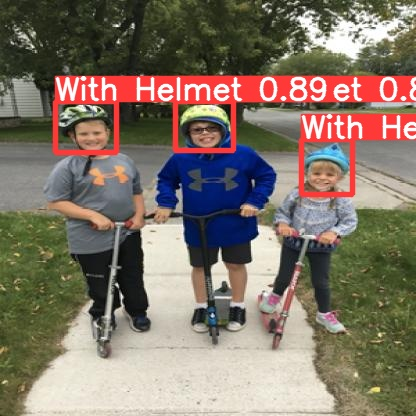

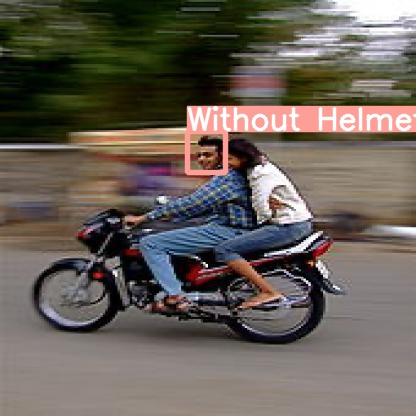

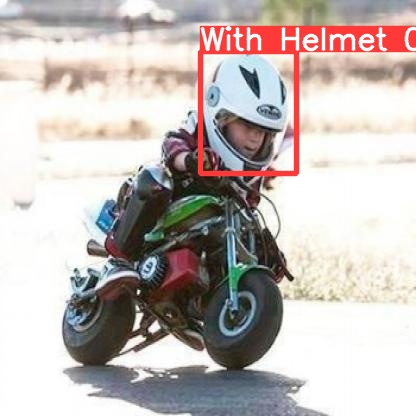

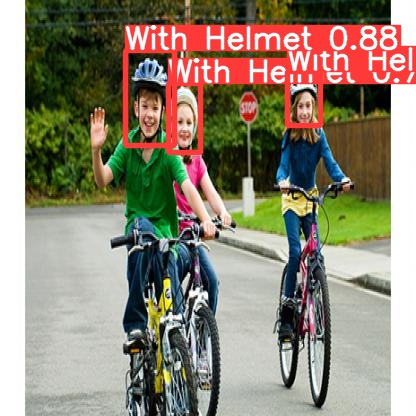

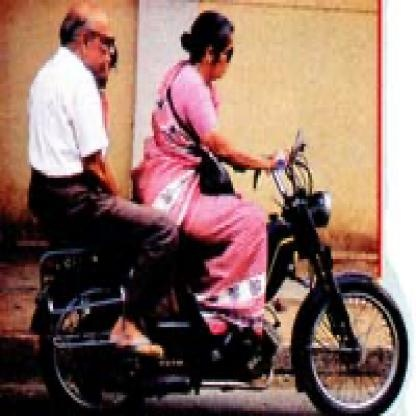

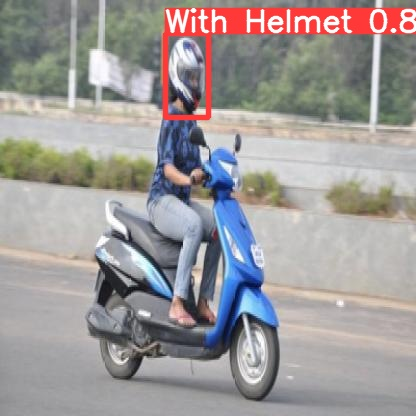

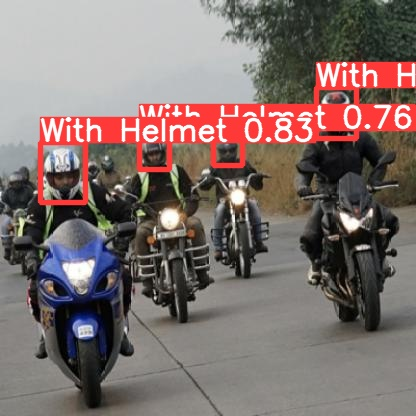

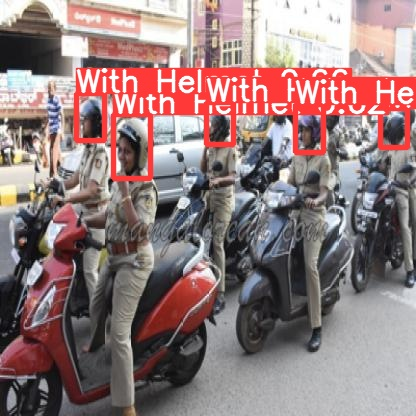

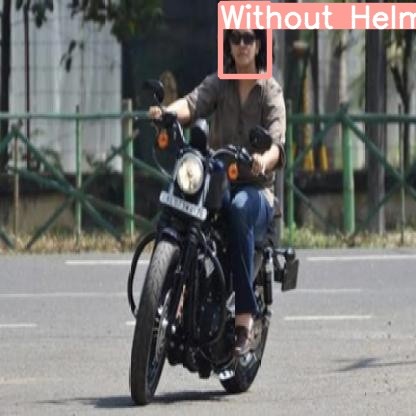

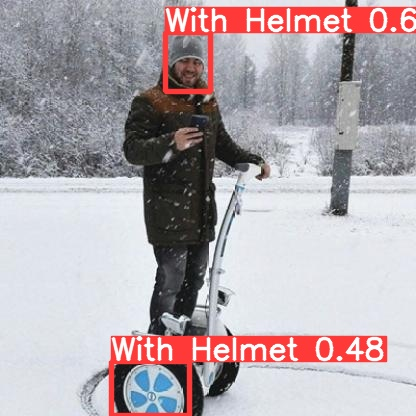

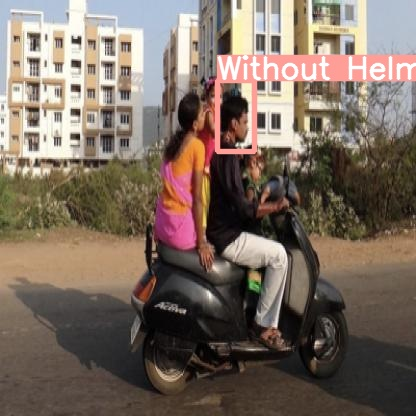

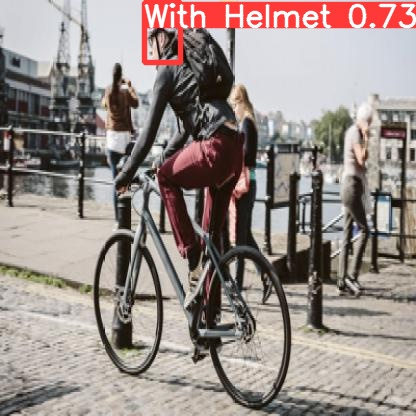

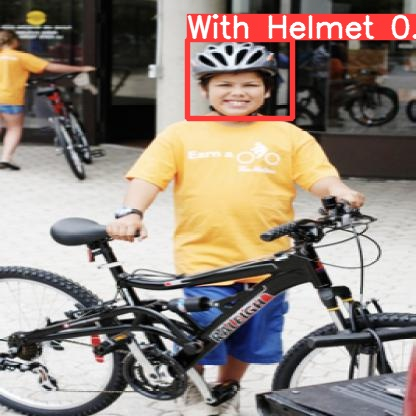

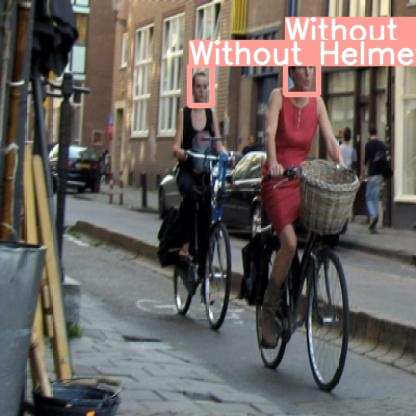

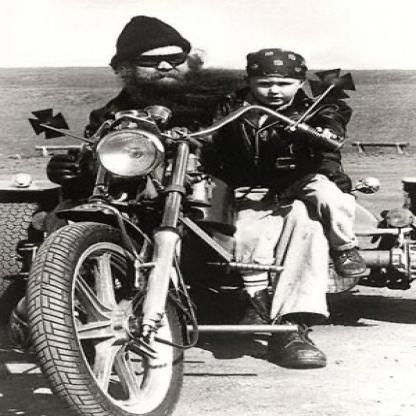

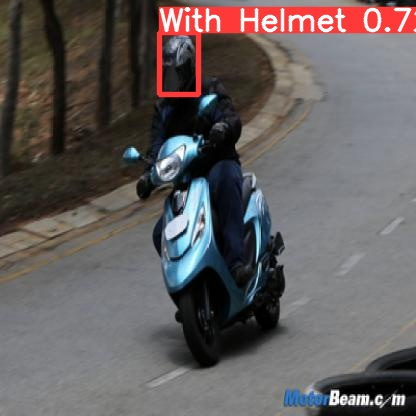

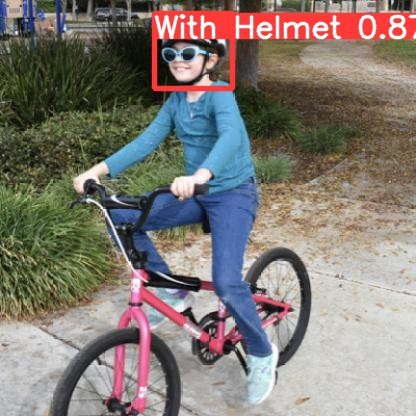

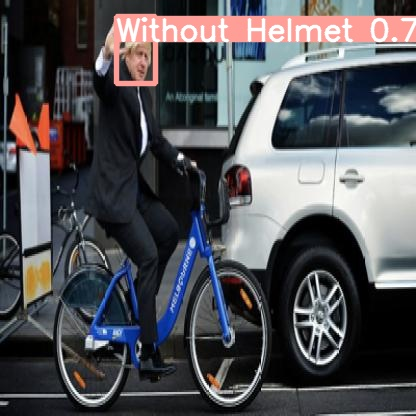

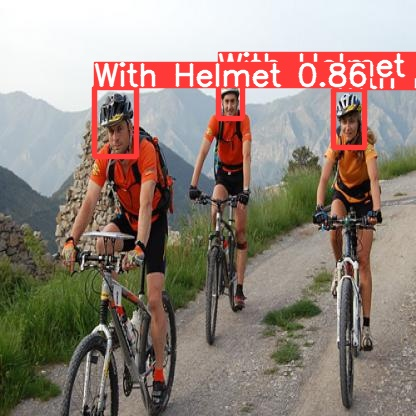

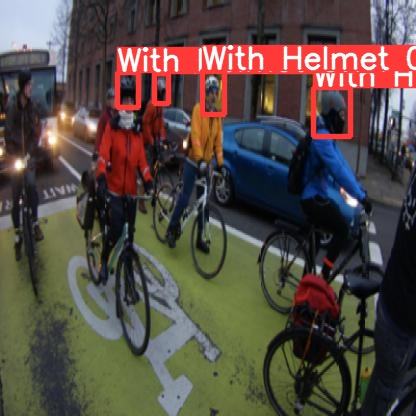

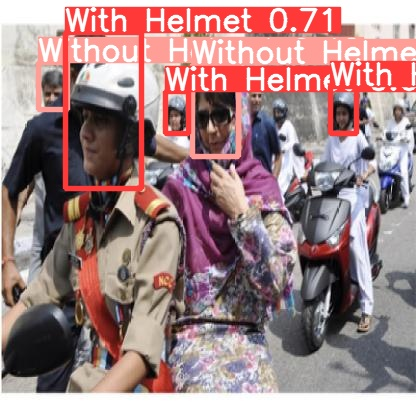

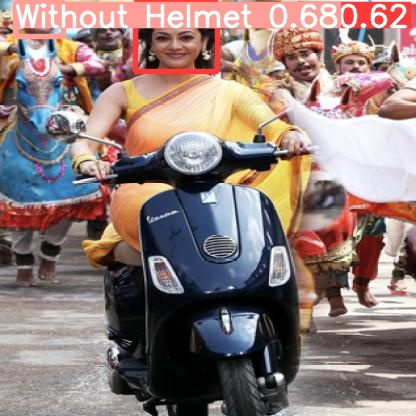

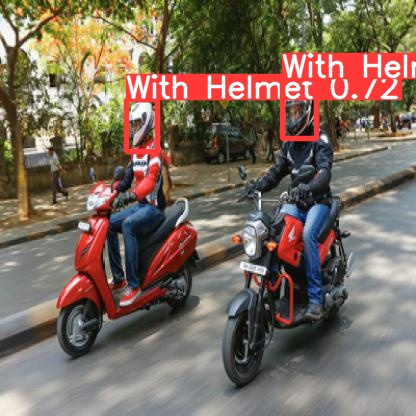

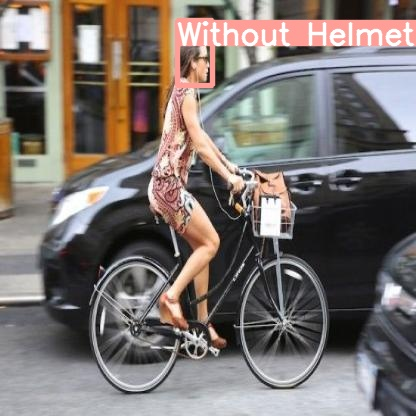

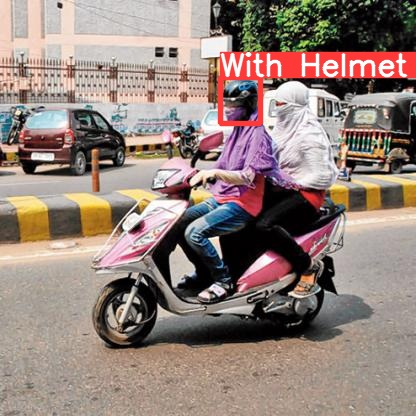

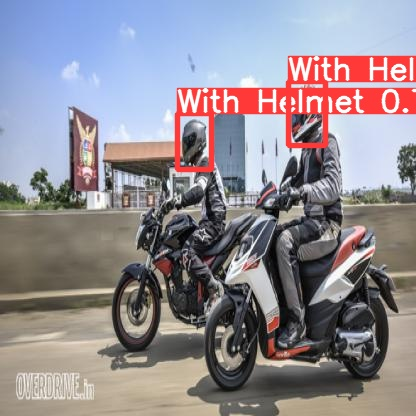

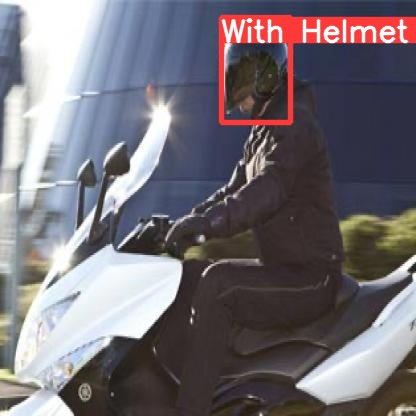

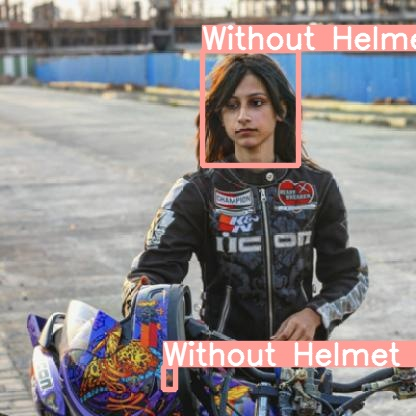

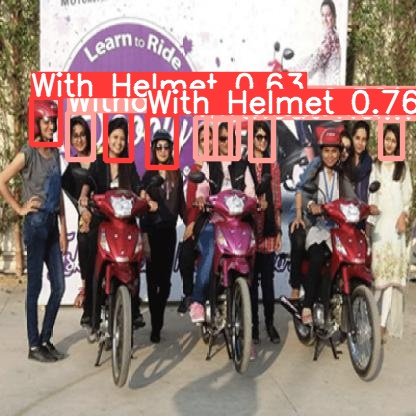

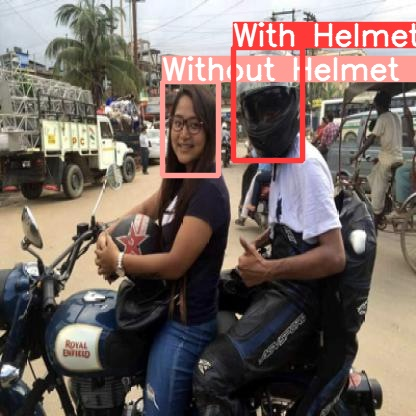

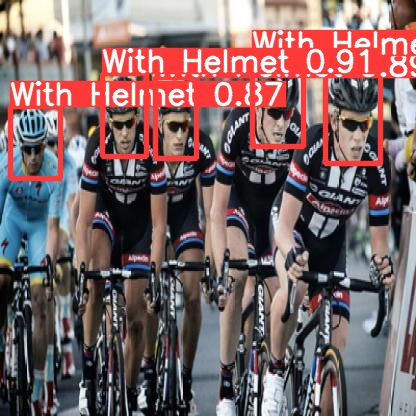

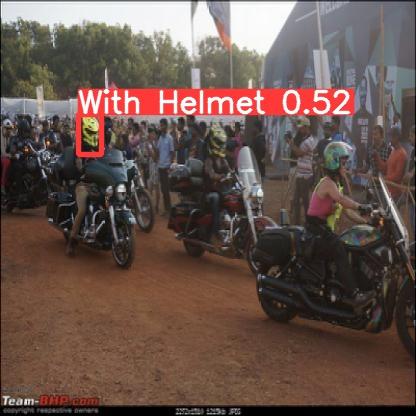

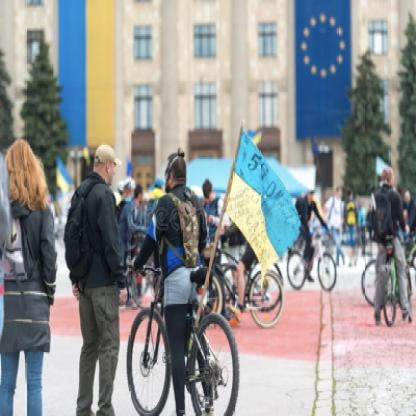

In [11]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('D:/Programming/Code/Python/TARP/yolov5/runs/detect/exp11/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Loading the Model

In [1]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='D:/Programming/Code/Python/TARP/yolov5/runs/train/yolov5s_results/weights/best.pt')

Using cache found in C:\Users\owner/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-5 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 


# Connecting to Raspberry Pi

In [ ]:
import RPi.GPIO as GPIO

LED_PIN = 17

# Set the mode to use the pin numbering of the Raspberry Pi
GPIO.setmode(GPIO.BCM)

# Set the LED pin as an output
GPIO.setup(LED_PIN, GPIO.OUT)

In [ ]:
def helmet_found(helmetstatus):
    if helmetstatus == 0:
         # Turn on the LED
        GPIO.output(LED_PIN, GPIO.HIGH)
    else:
        GPIO.output(LED_PIN, GPIO.LOW)

# Using OpenCV

In [2]:
import cv2
cap = cv2.VideoCapture(0)

# For Images

In [3]:
img = cv2.imread('D:\\Programming\\Code\\Python\\TARP\\test\\images\\BikesHelmets37_png.rf.3606c1b9dc335c6aad3587188d134571.jpg')

#cv2.imshow('YOLOv5', img)

import numpy as np

results = model(img)
output = np.array(results.render())
output = np.squeeze(output, axis = 0)
confidences = results.xyxy[0][:,4]
# Print the confidence scores of the first 10 detected objects
x = confidences[:10].tolist()
if x:
    print (x[:])

cv2.imshow('YOLOv5', output)
cv2.waitKey(0)  # Wait for user input to close window
cv2.destroyAllWindows()


[0.5245750546455383, 0.4323386549949646, 0.3738161027431488]


# For Videos:

In [5]:
import numpy as np

while True:
    ret, frame = cap.read()
    results = model(frame)

    '''
    confidences = results.xyxy[0][:,4]
    # Print the confidence scores of the first 10 detected objects
    x = confidences[:10].tolist()
    if x:
        print (x[:])
        '''
    
    confidences = results.xyxy[0][:, 4]
    class_labels = results.pred[0].tolist()

    # Create a list of (class, confidence) tuples
    class_confidence_tuples = list(zip(class_labels, confidences.tolist()))

    # Print the first 10 (class, confidence) tuples
    if class_confidence_tuples:
        for i in range(1):
            if class_confidence_tuples[i][0][-1] == 0.0:
                helmet_status = 1
            else:
                helmet_status = 0
            print("Class:", class_confidence_tuples[i][0][-1], "Confidence:", class_confidence_tuples[i][1])
            #helmet_found(helmet_status)

    output = np.array(results.render())
    output = np.squeeze(output, axis = 0)
    cv2.imshow('YOLOv5', output)
    if cv2.waitKey(0) == ord('q'):
        cv2.destroyAllWindows()
        break

AttributeError: 'NoneType' object has no attribute 'shape'

In [7]:
import numpy as np
ret, frame = cap.read()
if ret:
    results = model(frame)
    confidences = results.xyxy[0][:,4]

# Print the confidence scores of the first 10 detected objects
    print(confidences[:10])
    output = np.array(results.render())
    output = np.squeeze(output, axis = 0)
    size = output.size
    print(size)
    if results is not None:
        print(output.shape)
    print("Frame:")
    print(frame.shape, frame.size)
            

tensor([])
921600
(480, 640, 3)
Frame:
(480, 640, 3) 921600
